In [2]:
import sys
dirname = '/Users/muhammaddaffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

import pandas as pd
import numpy as np
from smt.surrogate_models import KRG
from smt.problems import WingWeight
from smt.sampling_methods import LHS
from sklearn.metrics import mean_squared_error


from smt.explainability_tools import PartialDependenceDisplay, PDFeatureImportanceDisplay
# from smt.explainability_tools import partial_dependence, pd_feature_importance


In [2]:
# ndoe = 625 
# fun = WingWeight()
# sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
# X = sampling(ndoe)
# y = fun(X)

# X_tr, y_tr = X[:500, :], y[:500]
# X_te, y_te = X[500:, :], y[500:]

In [3]:
X_tr = pd.read_csv('../../X_tr_wing_weight.csv')
X_te = pd.read_csv('../../X_te_wing_weight.csv')
y_tr = pd.read_csv('../../y_tr_wing_weight.csv')
y_te = pd.read_csv('../../y_te_wing_weight.csv')
X_tr = np.array(X_tr)
X_te = np.array(X_te)
y_tr = np.array(y_tr)
y_te = np.array(y_te)

In [4]:
kriging_model = KRG(
    theta0=[1e-2]*X_tr.shape[1],
    print_prediction = False
    )
kriging_model.set_training_values(
    X_tr, 
    y_tr
    )

kriging_model.train()
y_pred = kriging_model.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 500
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec): 12.0548959
RMSE: 0.0470


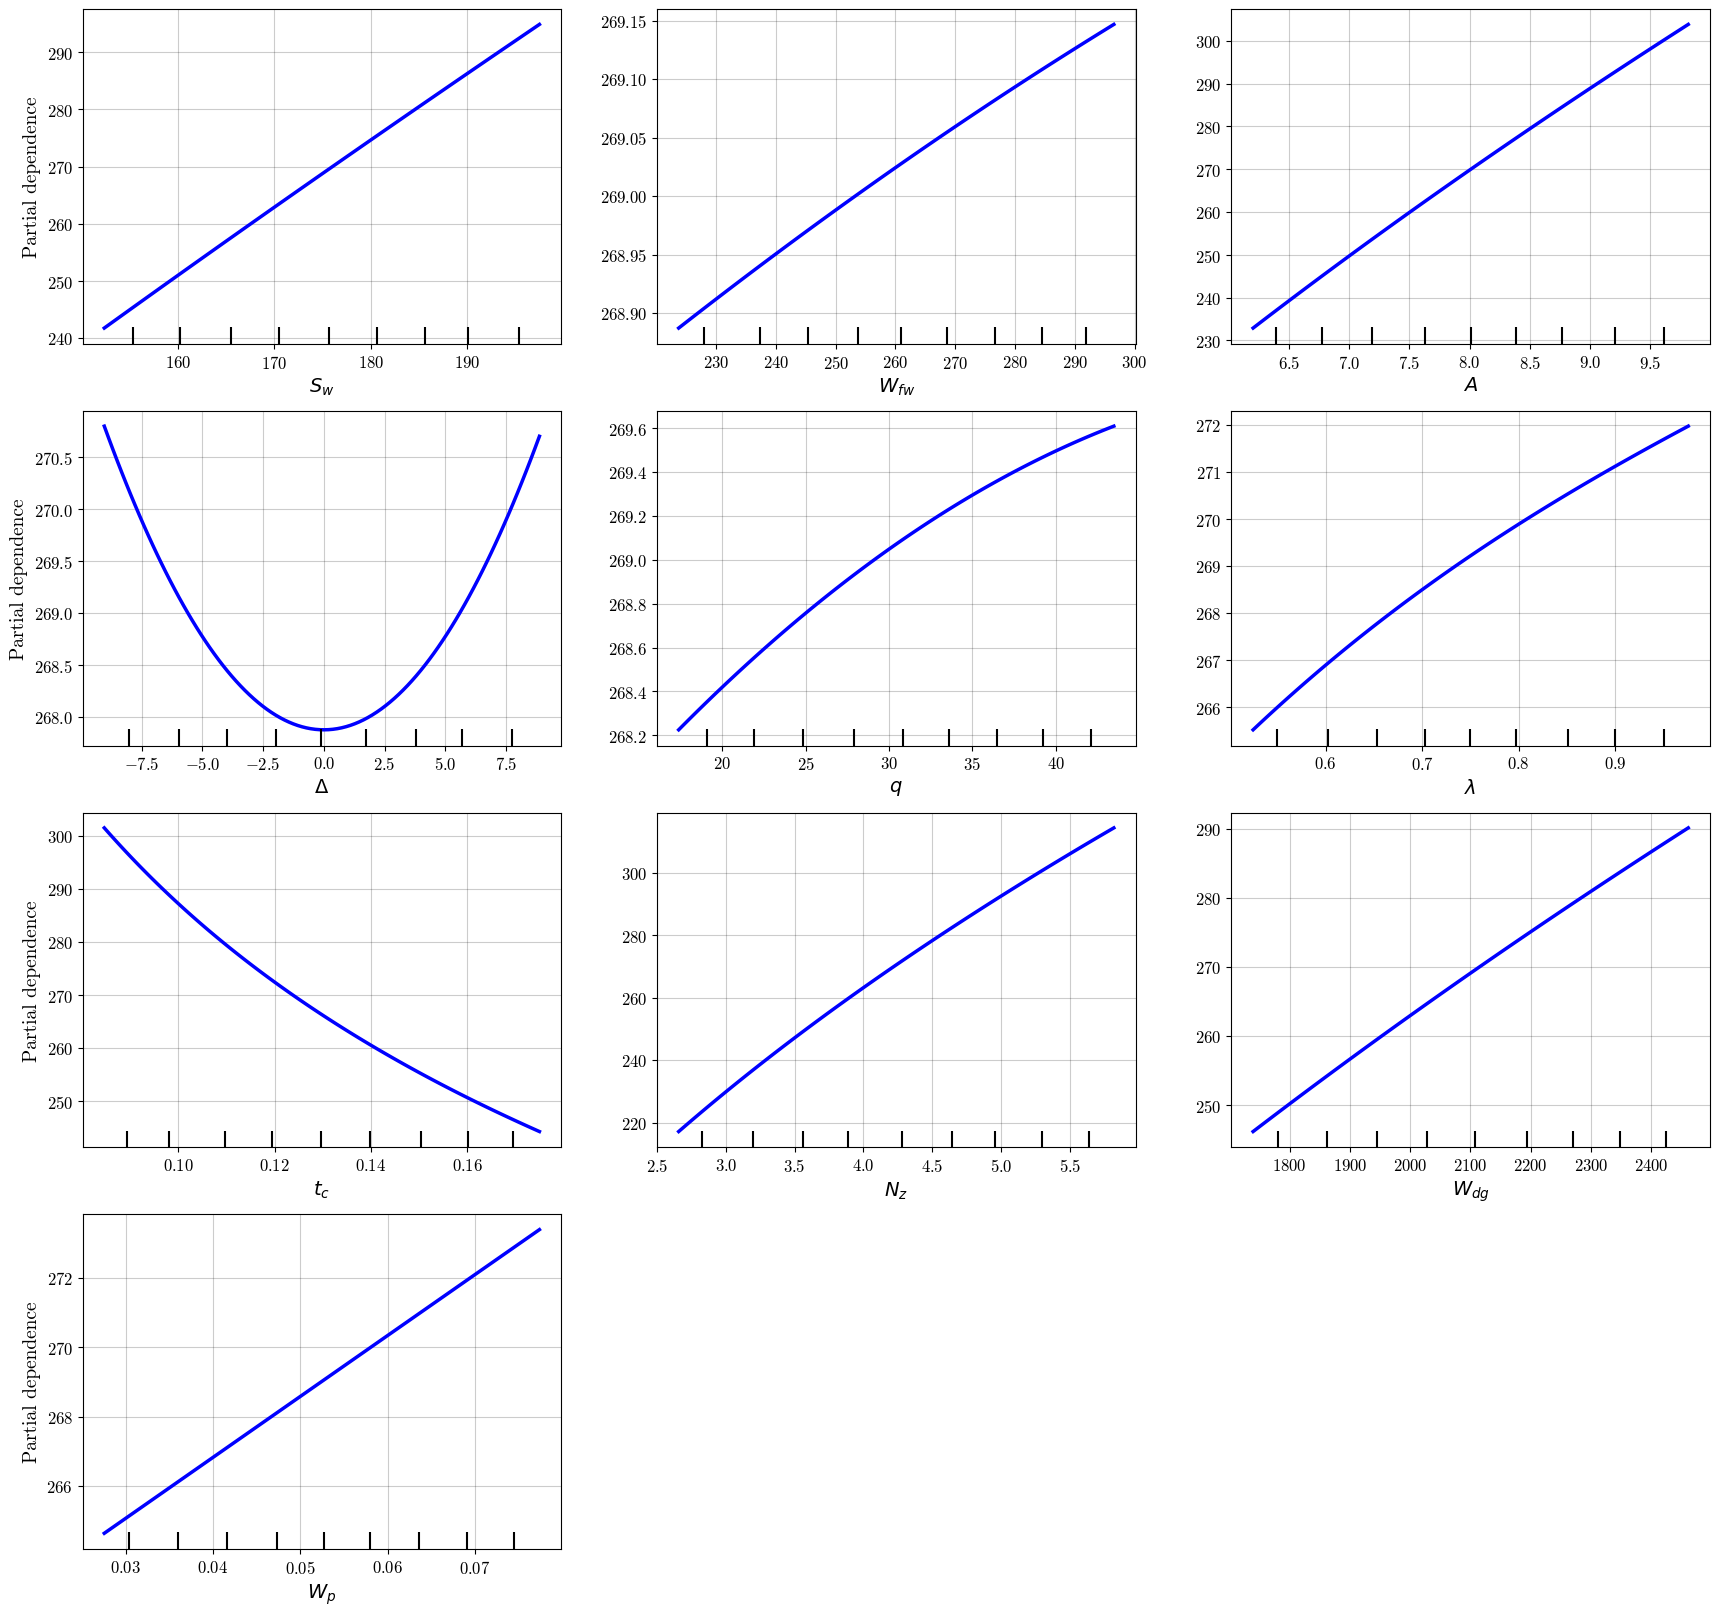

In [5]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='average',
    feature_names=feature_names,
    centered=False
    )

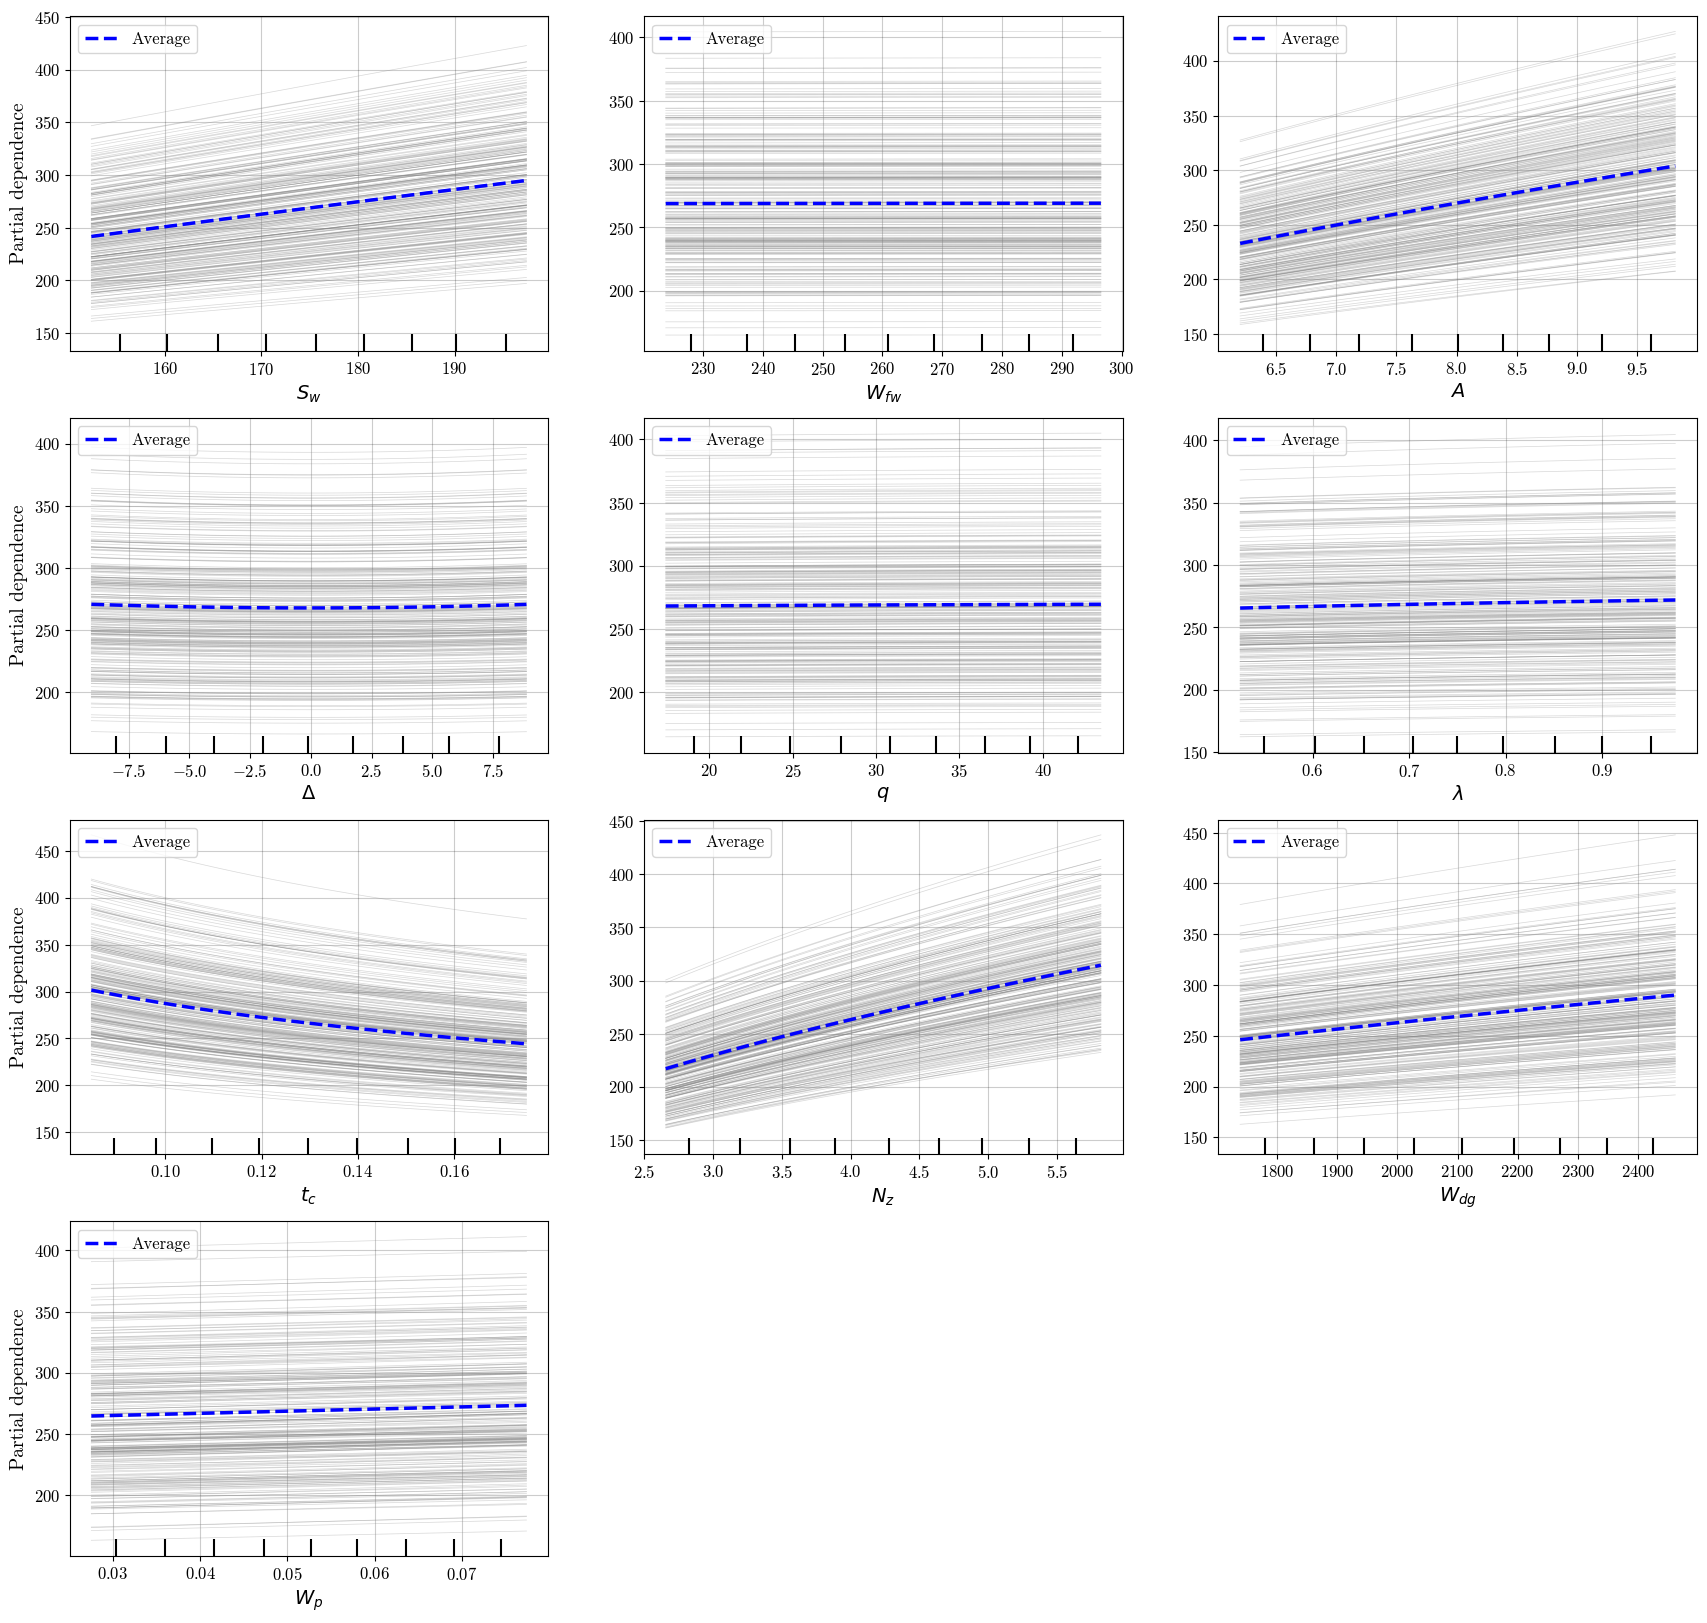

In [6]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both', 
    feature_names=feature_names,
    centered=False
    )

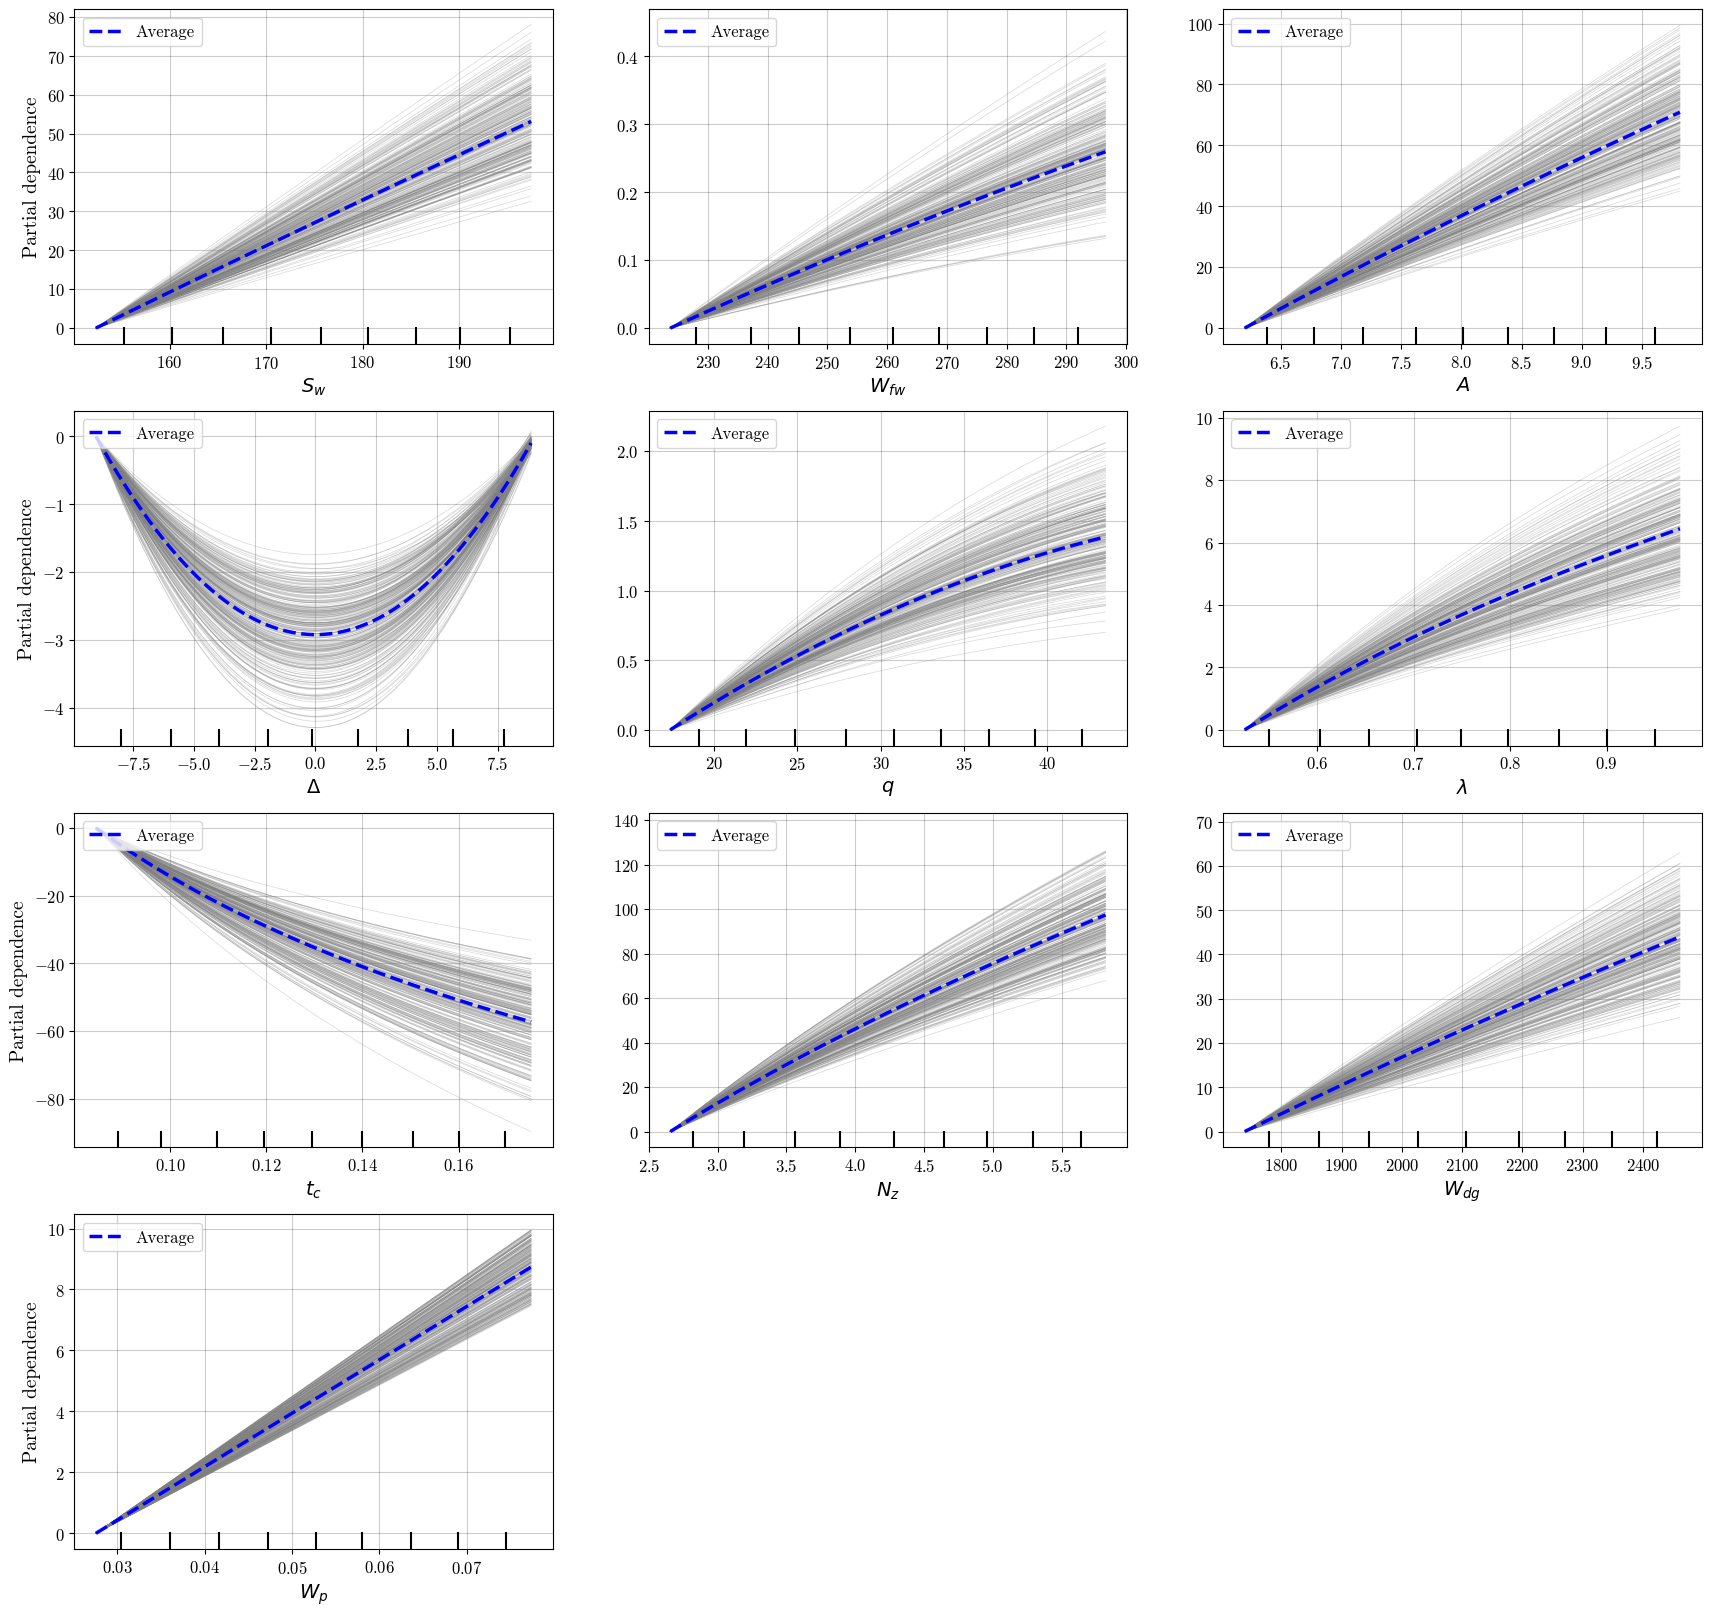

In [7]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both', 
    feature_names=feature_names,
    centered=True
    )

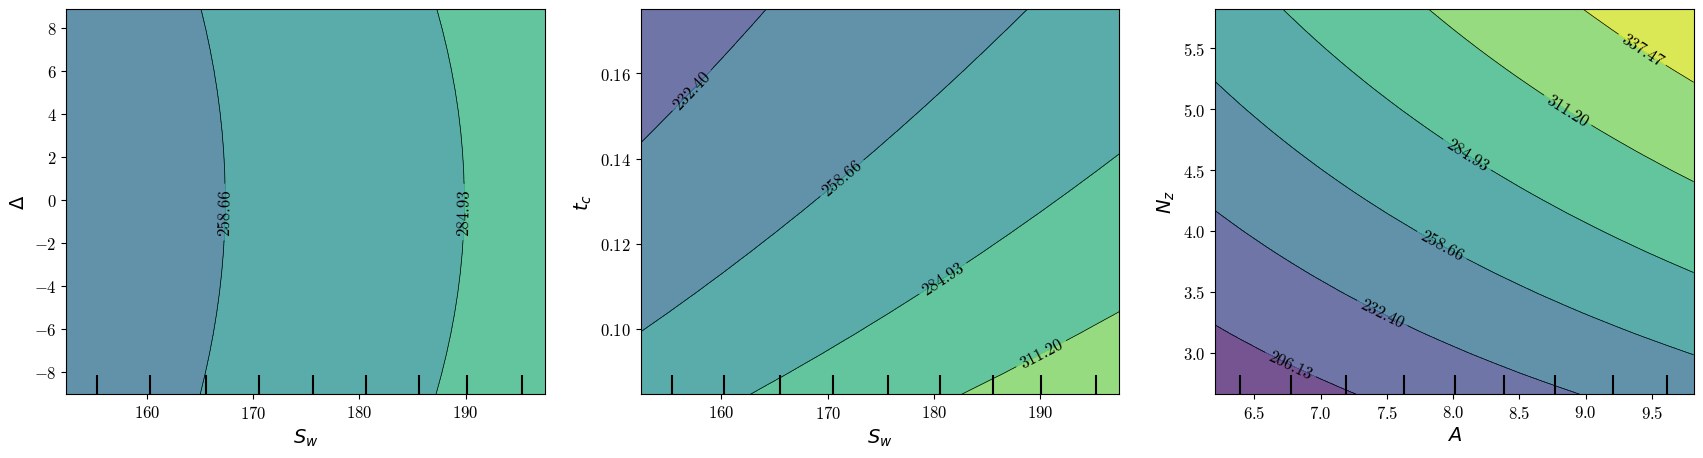

In [8]:
model = kriging_model
features = [(0, 3), (0, 6), (2, 7)]
# features = [(0, 3)]
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=20, 
    kind='average', 
    feature_names=feature_names,
    centered=False
    )

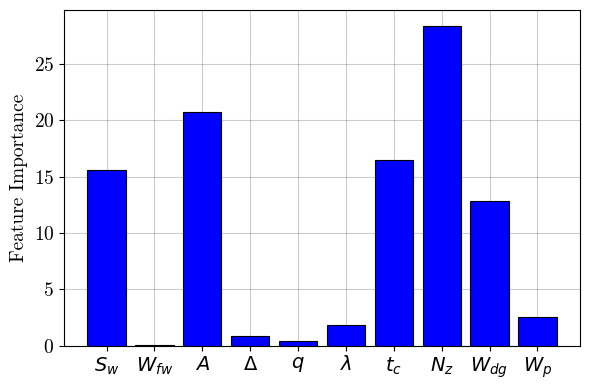

In [9]:
model = kriging_model
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']

feature_importance = PDFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    feature_names=feature_names
)

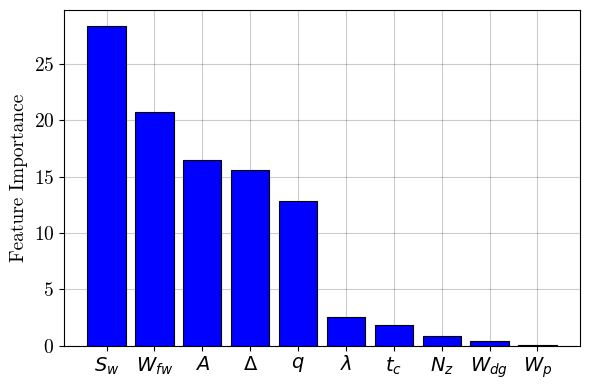

In [10]:
model = kriging_model
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']

feature_importance = PDFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    feature_names=feature_names, 
    sorted=True
)